In [1]:
from neuronpopulation import NeuronPopulation,SNN
from PyNeuron import LIF
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
# time course function for exitatory population
def ex_time_corse(time):
    meu=0
    sigma=25
    return 500*(1/(sigma*math.sqrt(2*math.pi)))*math.exp(-((time-meu)/sigma)**2)

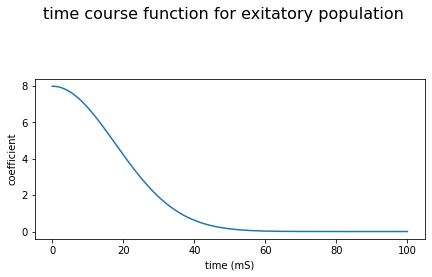

In [3]:
# time course plot
times=np.arange(0,100,0.01)
y=np.zeros_like(times)
for i,t in enumerate(times):
    y[i]=ex_time_corse(t)
    
figure=plt.figure(figsize=(7,10))
figure.suptitle('time course function for exitatory population',fontsize=16)
ax1=figure.add_subplot(311)
ax1.plot(times,y)
ax1.set_ylabel("coefficient")
ax1.set_xlabel("time (mS)")
plt.show()

# 1

# stdp learning on 3 neuron with different constant current

In [4]:
connection_details={
    'type':'fully_ex_connection',
    'j':20
}
neuron_list=[]
population_size=3
seed=42
np.random.seed(seed)
for i in range(population_size):
    neuron_list.append(LIF(10+np.random.rand()*3,8+np.random.rand()*4,-79,-50,5,-68))
population=NeuronPopulation(population_type='exitatory',
                            connection_details=connection_details,
                            neuron_list=neuron_list,
                            time_course=ex_time_corse)

In [5]:
input_current_list=[lambda x:4200,lambda x:3400,lambda x:6500]

In [6]:
population.run_and_learn(learning_rule='STDP',
                         input_current_list=input_current_list,
                         time_interval=50,
                         dt=0.03125,
                         dt_minus=6,
                         dt_plus=10,
                         a_minus=-4,
                         a_plus=+6,
                         time_course_threshold=0.3)

In [7]:
# time variable list
timelist=[]
time=0
dt=0.03125
for i in range(len(population.connection_history)):
    timelist.append(time)
    time+=dt

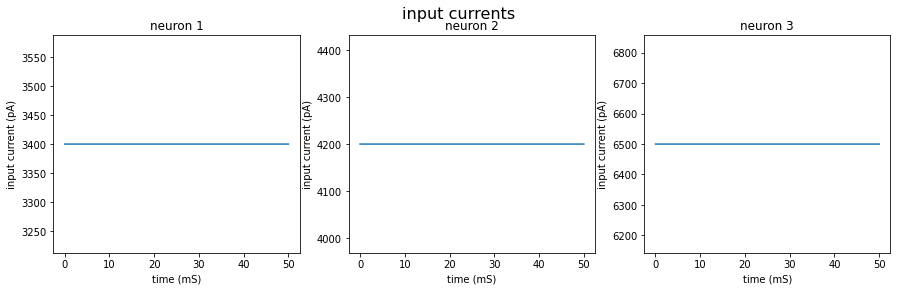

In [8]:
# input currents
figure=plt.figure(figsize=(15,4))
figure.suptitle('input currents',fontsize=16)

# neuron1
ax1=figure.add_subplot(131)
current=np.ones((len(timelist)))*3400
ax1.plot(timelist,current)
ax1.set_ylabel("input current (pA)")
ax1.set_xlabel("time (mS)")
ax1.set_title('neuron 1')

# neuron2
ax1=figure.add_subplot(132)
current=np.ones((len(timelist)))*4200
ax1.plot(timelist,current)
ax1.set_ylabel("input current (pA)")
ax1.set_xlabel("time (mS)")
ax1.set_title('neuron 2')

# neuron3
ax1=figure.add_subplot(133)
current=np.ones((len(timelist)))*6500
ax1.plot(timelist,current)
ax1.set_ylabel("input current (pA)")
ax1.set_xlabel("time (mS)")
ax1.set_title('neuron 3')
plt.show()

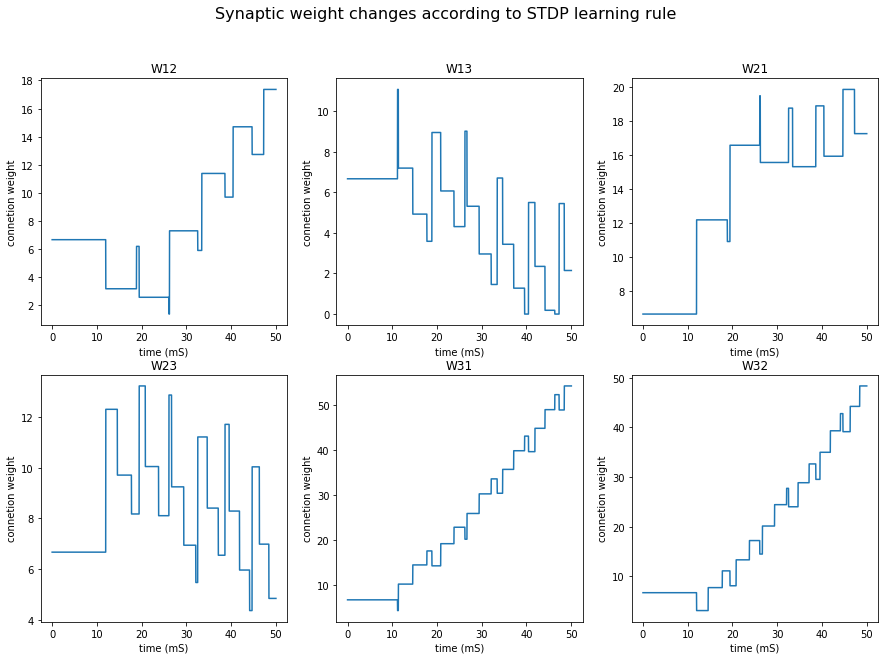

In [9]:
# Synaptic weight changes according to STDP learning rule
figure=plt.figure(figsize=(15,10))
figure.suptitle('Synaptic weight changes according to STDP learning rule',fontsize=16)

# w12
ax1=figure.add_subplot(231)
ax1.plot(timelist,population.connection_history[:,1])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W12')


# w13
ax1=figure.add_subplot(232)
ax1.plot(timelist,population.connection_history[:,2])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W13')

# w21
ax1=figure.add_subplot(233)
ax1.plot(timelist,population.connection_history[:,3])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W21')


# w23
ax1=figure.add_subplot(234)
ax1.plot(timelist,population.connection_history[:,5])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W23')


# w31
ax1=figure.add_subplot(235)
ax1.plot(timelist,population.connection_history[:,6])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W31')

# w32
ax1=figure.add_subplot(236)
ax1.plot(timelist,population.connection_history[:,7])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W32')

plt.show()

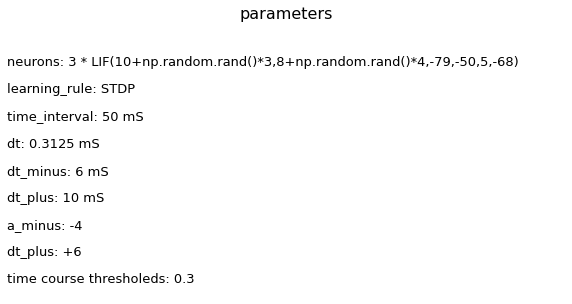

In [10]:
figure=plt.figure(figsize=(10,5))
# parameters
ax1=figure.add_subplot(111)
ax1.text(0,0.85,'neurons: 3 * LIF(10+np.random.rand()*3,8+np.random.rand()*4,-79,-50,5,-68)',fontsize=13)
ax1.text(0,0.75,'learning_rule: STDP',fontsize=13)
ax1.text(0,0.65,'time_interval: 50 mS',fontsize=13)
ax1.text(0,0.55,'dt: 0.3125 mS',fontsize=13)
ax1.text(0,0.45,'dt_minus: 6 mS',fontsize=13)
ax1.text(0,0.35,'dt_plus: 10 mS',fontsize=13)
ax1.text(0,0.25,'a_minus: -4',fontsize=13)
ax1.text(0,0.15,'dt_plus: +6',fontsize=13)
ax1.text(0,0.05,'time course thresholeds: 0.3',fontsize=13)
ax1.set_title('parameters',fontsize=16)
ax1.set_axis_off()

# STDP Learning rule with two neurons with different constant input currents and one neuron with sine input current

In [11]:
connection_details={
    'type':'fully_ex_connection',
    'j':20
}
neuron_list=[]
population_size=3
seed=42
np.random.seed(seed)
for i in range(population_size):
    neuron_list.append(LIF(10+np.random.rand()*3,8+np.random.rand()*4,-79,-50,5,-68))
population=NeuronPopulation(population_type='exitatory',
                            connection_details=connection_details,
                            neuron_list=neuron_list,
                            time_course=ex_time_corse)

In [12]:
current1=lambda x:3400
current2=lambda x:4200
current3=lambda x:4000*(math.sin(x)+0.9)
input_current_list=[current1,current2,current3]

In [13]:
population.run_and_learn(learning_rule='STDP',
                         input_current_list=input_current_list,
                         time_interval=50,
                         dt=0.03125,
                         dt_minus=6,
                         dt_plus=10,
                         a_minus=-4,
                         a_plus=+6,
                         time_course_threshold=0.3)

In [14]:
# time variable list
timelist=[]
time=0
dt=0.03125
for i in range(len(population.connection_history)):
    timelist.append(time)
    time+=dt

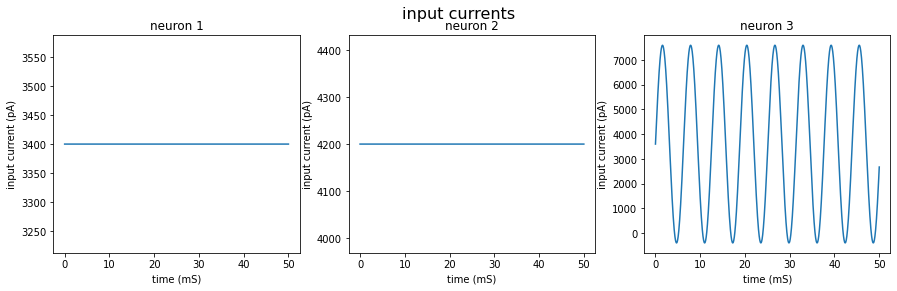

In [15]:
# input currents
figure=plt.figure(figsize=(15,4))
figure.suptitle('input currents',fontsize=16)

# neuron1
ax1=figure.add_subplot(131)
current=[]
for i in timelist:
    current.append(current1(i))
ax1.plot(timelist,current)
ax1.set_ylabel("input current (pA)")
ax1.set_xlabel("time (mS)")
ax1.set_title('neuron 1')

# neuron2
ax1=figure.add_subplot(132)
current=[]
for i in timelist:
    current.append(current2(i))
ax1.plot(timelist,current)
ax1.set_ylabel("input current (pA)")
ax1.set_xlabel("time (mS)")
ax1.set_title('neuron 2')

# neuron3
ax1=figure.add_subplot(133)
current=[]
for i in timelist:
    current.append(current3(i))
ax1.plot(timelist,current)
ax1.set_ylabel("input current (pA)")
ax1.set_xlabel("time (mS)")
ax1.set_title('neuron 3')
plt.show()

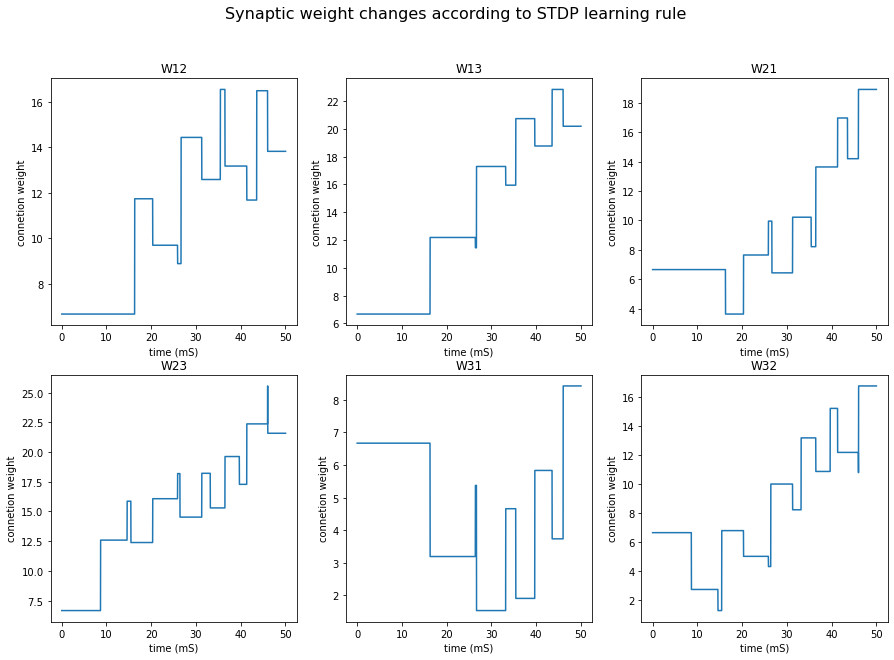

In [16]:
# Synaptic weight changes according to STDP learning rule
figure=plt.figure(figsize=(15,10))
figure.suptitle('Synaptic weight changes according to STDP learning rule',fontsize=16)

# w12
ax1=figure.add_subplot(231)
ax1.plot(timelist,population.connection_history[:,1])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W12')


# w13
ax1=figure.add_subplot(232)
ax1.plot(timelist,population.connection_history[:,2])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W13')

# w21
ax1=figure.add_subplot(233)
ax1.plot(timelist,population.connection_history[:,3])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W21')


# w23
ax1=figure.add_subplot(234)
ax1.plot(timelist,population.connection_history[:,5])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W23')


# w31
ax1=figure.add_subplot(235)
ax1.plot(timelist,population.connection_history[:,6])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W31')

# w32
ax1=figure.add_subplot(236)
ax1.plot(timelist,population.connection_history[:,7])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W32')

plt.show()

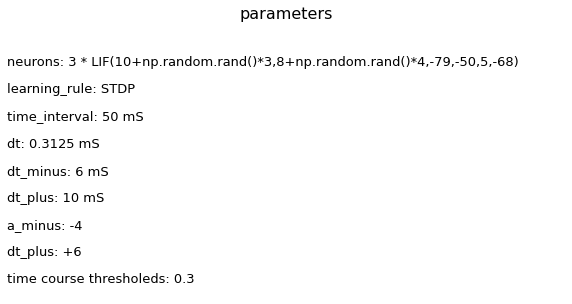

In [17]:
figure=plt.figure(figsize=(10,5))
# parameters
ax1=figure.add_subplot(111)
ax1.text(0,0.85,'neurons: 3 * LIF(10+np.random.rand()*3,8+np.random.rand()*4,-79,-50,5,-68)',fontsize=13)
ax1.text(0,0.75,'learning_rule: STDP',fontsize=13)
ax1.text(0,0.65,'time_interval: 50 mS',fontsize=13)
ax1.text(0,0.55,'dt: 0.3125 mS',fontsize=13)
ax1.text(0,0.45,'dt_minus: 6 mS',fontsize=13)
ax1.text(0,0.35,'dt_plus: 10 mS',fontsize=13)
ax1.text(0,0.25,'a_minus: -4',fontsize=13)
ax1.text(0,0.15,'dt_plus: +6',fontsize=13)
ax1.text(0,0.05,'time course thresholeds: 0.3',fontsize=13)
ax1.set_title('parameters',fontsize=16)
ax1.set_axis_off()

# STDP Learning rule with constant, sine and step input currents

In [18]:
connection_details={
    'type':'fully_ex_connection',
    'j':20
}
neuron_list=[]
population_size=3
seed=42
np.random.seed(seed)
for i in range(population_size):
    neuron_list.append(LIF(10+np.random.rand()*3,8+np.random.rand()*4,-79,-50,5,-68))
population=NeuronPopulation(population_type='exitatory',
                            connection_details=connection_details,
                            neuron_list=neuron_list,
                            time_course=ex_time_corse)

In [19]:
current1=lambda x:3000+np.random.rand()*1000
current2=lambda x:4200
current3=lambda x:4000*(math.sin(x)+0.9)
input_current_list=[current1,current2,current3]

In [20]:
population.run_and_learn(learning_rule='STDP',
                         input_current_list=input_current_list,
                         time_interval=50,
                         dt=0.03125,
                         dt_minus=6,
                         dt_plus=10,
                         a_minus=-4,
                         a_plus=+6,
                         time_course_threshold=0.3)

In [21]:
# time variable list
timelist=[]
time=0
dt=0.03125
for i in range(len(population.connection_history)):
    timelist.append(time)
    time+=dt

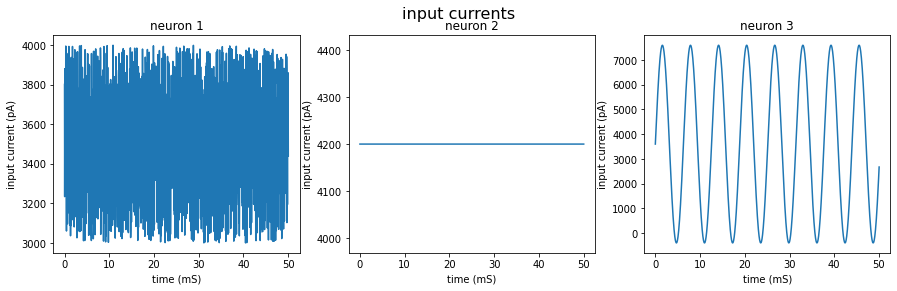

In [22]:
# input currents
figure=plt.figure(figsize=(15,4))
figure.suptitle('input currents',fontsize=16)

# neuron1
ax1=figure.add_subplot(131)
current=[]
for i in timelist:
    current.append(current1(i))
ax1.plot(timelist,current)
ax1.set_ylabel("input current (pA)")
ax1.set_xlabel("time (mS)")
ax1.set_title('neuron 1')

# neuron2
ax1=figure.add_subplot(132)
current=[]
for i in timelist:
    current.append(current2(i))
ax1.plot(timelist,current)
ax1.set_ylabel("input current (pA)")
ax1.set_xlabel("time (mS)")
ax1.set_title('neuron 2')

# neuron3
ax1=figure.add_subplot(133)
current=[]
for i in timelist:
    current.append(current3(i))
ax1.plot(timelist,current)
ax1.set_ylabel("input current (pA)")
ax1.set_xlabel("time (mS)")
ax1.set_title('neuron 3')
plt.show()

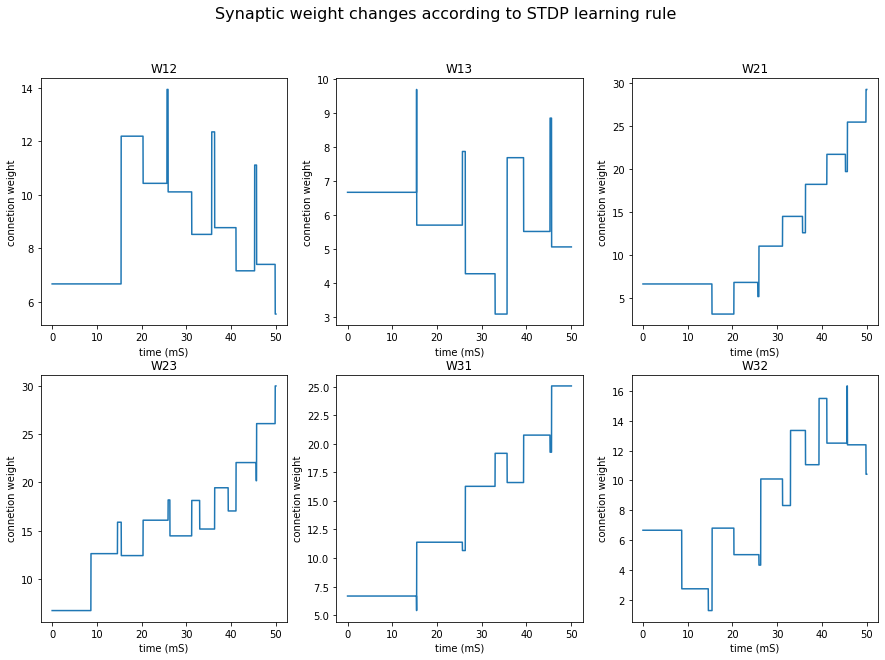

In [23]:
# Synaptic weight changes according to STDP learning rule
figure=plt.figure(figsize=(15,10))
figure.suptitle('Synaptic weight changes according to STDP learning rule',fontsize=16)

# w12
ax1=figure.add_subplot(231)
ax1.plot(timelist,population.connection_history[:,1])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W12')


# w13
ax1=figure.add_subplot(232)
ax1.plot(timelist,population.connection_history[:,2])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W13')

# w21
ax1=figure.add_subplot(233)
ax1.plot(timelist,population.connection_history[:,3])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W21')


# w23
ax1=figure.add_subplot(234)
ax1.plot(timelist,population.connection_history[:,5])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W23')


# w31
ax1=figure.add_subplot(235)
ax1.plot(timelist,population.connection_history[:,6])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W31')

# w32
ax1=figure.add_subplot(236)
ax1.plot(timelist,population.connection_history[:,7])
ax1.set_ylabel("connetion weight")
ax1.set_xlabel("time (mS)")
ax1.set_title('W32')

plt.show()

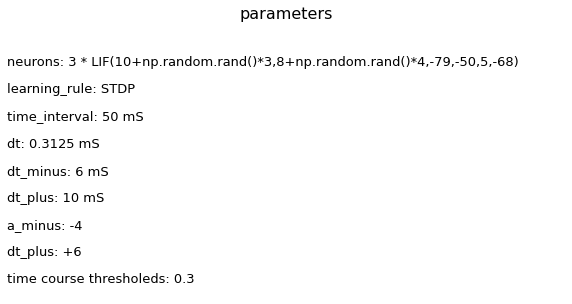

In [24]:
figure=plt.figure(figsize=(10,5))
# parameters
ax1=figure.add_subplot(111)
ax1.text(0,0.85,'neurons: 3 * LIF(10+np.random.rand()*3,8+np.random.rand()*4,-79,-50,5,-68)',fontsize=13)
ax1.text(0,0.75,'learning_rule: STDP',fontsize=13)
ax1.text(0,0.65,'time_interval: 50 mS',fontsize=13)
ax1.text(0,0.55,'dt: 0.3125 mS',fontsize=13)
ax1.text(0,0.45,'dt_minus: 6 mS',fontsize=13)
ax1.text(0,0.35,'dt_plus: 10 mS',fontsize=13)
ax1.text(0,0.25,'a_minus: -4',fontsize=13)
ax1.text(0,0.15,'dt_plus: +6',fontsize=13)
ax1.text(0,0.05,'time course thresholeds: 0.3',fontsize=13)
ax1.set_title('parameters',fontsize=16)
ax1.set_axis_off()

# 2

In [25]:
# time course function for SNN
def time_corse_2(time):
    meu=0
    sigma=7.5
    return 250*(1/(sigma*math.sqrt(2*math.pi)))*math.exp(-((time-meu)/sigma)**2)

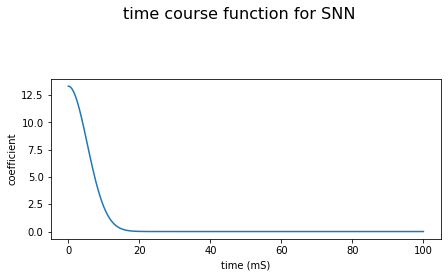

In [26]:
# time course plot
times=np.arange(0,100,0.01)
y=np.zeros_like(times)
for i,t in enumerate(times):
    y[i]=time_corse_2(t)
    
figure=plt.figure(figsize=(7,10))
figure.suptitle('time course function for SNN',fontsize=16)
ax1=figure.add_subplot(311)
ax1.plot(times,y)
ax1.set_ylabel("coefficient")
ax1.set_xlabel("time (mS)")
plt.show()

In [27]:
dataset=pd.read_excel('./CN_3_DATASET.xlsx')
dataset

,test,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,inpput_neuron_number,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10
1,1.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0
2,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
3,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0
5,5.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0
6,output_neuron_number,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,inpput_neuron_number,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10


In [28]:
x_train=dataset.iloc[1:6,1:].values.T*10000
y_train=dataset.iloc[6,1:].values
x_test=dataset.iloc[10:15,1:].values.T*10000
y_test=dataset.iloc[15,1:].values

In [29]:
x_train

array([[10000.0, 10000.0, 0.0, 0.0, 0.0],
       [20000.0, 10000.0, 10000.0, 0.0, 0.0],
       [30000.0, 10000.0, 0.0, 0.0, 0.0],
       [20000.0, 0.0, 0.0, 0.0, 0.0],
       [10000.0, 10000.0, 0.0, 0.0, 10000.0],
       [10000.0, 0.0, 0.0, 0.0, 20000.0],
       [0.0, 10000.0, 0.0, 30000.0, 0.0],
       [0.0, 0.0, 0.0, 10000.0, 10000.0],
       [0.0, 0.0, 0.0, 0.0, 10000.0],
       [20000.0, 20000.0, 20000.0, 10000.0, 20000.0]], dtype=object)

In [30]:
y_train

array([1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0], dtype=object)

In [31]:
x_test

array([[10000.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 10000.0, 0.0, 0.0, 0.0],
       [0.0, 20000.0, 0.0, 0.0, 0.0],
       [20000.0, 20000.0, 10000.0, 0.0, 0.0],
       [10000.0, 20000.0, 0.0, 0.0, 0.0],
       [10000.0, 0.0, 0.0, 0.0, 30000.0],
       [30000.0, 10000.0, 0.0, 20000.0, 30000.0],
       [0.0, 0.0, 20000.0, 20000.0, 20000.0],
       [10000.0, 20000.0, 0.0, 10000.0, 10000.0],
       [20000.0, 20000.0, 20000.0, 30000.0, 30000.0]], dtype=object)

In [32]:
y_test

array([1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], dtype=object)

In [64]:
# network initialization
np.random.seed(42)

lif_neuron_parameters={
    'R':10,
    'tau':8,
    'u_rest':-79,
    'threshold':-50,
    'u_spike':5,
    'u_reset':-68,
    'random':True,
    'rand_change':2
}

connection_details={
    'connection_type':'fully_connect',
    'j':8
}

neural_network=SNN(network_dim=(5,2),
                   
                   lif_neuron_parameters=lif_neuron_parameters,
                   time_course=time_corse_2,
                   connection_details=connection_details,
                   tau_tag=15,
                   tau_dopamine=15,
                   reward_score=5)

In [67]:
neural_network.fit(x_train,
                   y_train,
                   dt=0.125,
                   epoch_time=5,
                   dt_minus=6,
                   dt_plus=10,
                   a_minus=-4,
                   a_plus=+6,
                   time_course_threshold=1,iterations=30,learn_time=0.5)

In [70]:
pred_train=neural_network.predict(x_train,5,0.125,1)
pred_train

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])

In [72]:
from sklearn import metrics

In [74]:
print('accuracy of SNN on train data: ',metrics.accuracy_score(y_train.astype(np.int32),pred_train.astype(np.int32)))

accuracy of SNN on train data:  0.8


In [75]:
pred_test=neural_network.predict(x_test,5,0.125,1)
pred_test

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 0.])

In [76]:
print('accuracy of SNN on test data: ',metrics.accuracy_score(y_test.astype(np.int32),pred_test.astype(np.int32)))

accuracy of SNN on test data:  0.7


In [77]:
connections=neural_network.connection_history[0]

In [78]:
# time variable list
timelist=[]
time=0
dt=0.03125
for i in range(len(connections)):
    timelist.append(time)
    time+=dt

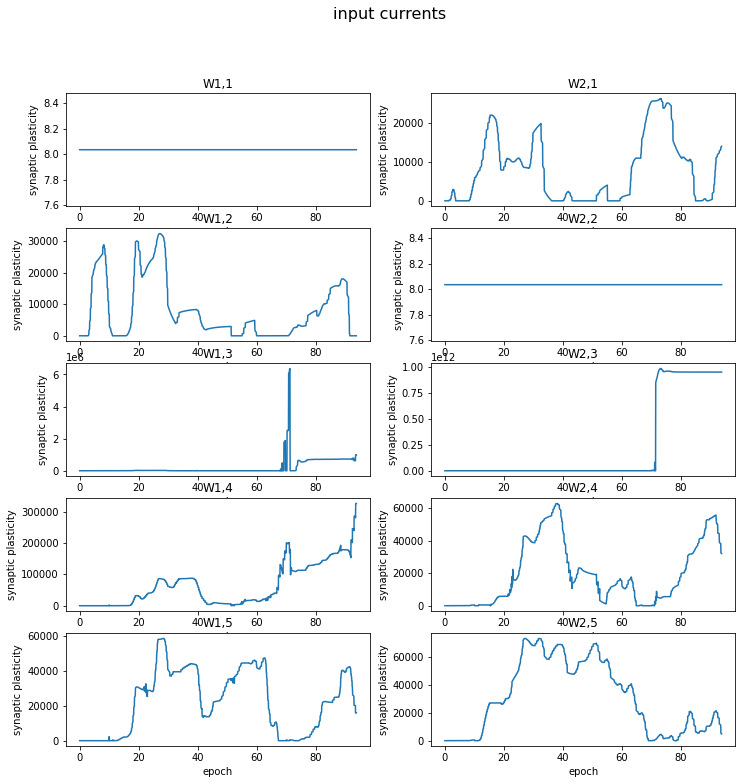

In [83]:
# plot synaptic plasticity diagrams
figure=plt.figure(figsize=(12,12))
figure.suptitle('input currents',fontsize=16)

for i in range(5):
    for j in range(2):
        ax = plt.subplot2grid((5,2), (i,j))
        ax.plot(timelist,connections[:,2*i+j])
        ax.set_ylabel("synaptic plasticity")
        ax.set_xlabel("epoch")
        ax.set_title(f'W{j+1},{i+1}')
        
plt.show()